In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD
#!pip install split-folders
from keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.backend import ndim
from keras.preprocessing import image

In [ ]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import layers

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing import image

import tensorflow.keras.backend as K

In [ ]:
import sys

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_data_dir='/content/gdrive/MyDrive/finger print detection/data'

In [ ]:

images_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_images, test_labels = next(images_generator.flow_from_directory('/content/gdrive/MyDrive/finger print detection/output/val',target_size=(00, 272),batch_size=int(30000)))

Found 53 images belonging to 5 classes.


In [ ]:

images_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_images, train_labels = next(images_generator.flow_from_directory('/home/user/Desktop/data_new',target_size=(200, 136),batch_size=int(30000)))

Found 451 images belonging to 5 classes.


In [ ]:
train_images.shape

In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Latent Space creation and classifier

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory('/home/user/Desktop/data_new',
                                                    batch_size = 20,
                                                    class_mode =  "sparse", 
                                                    target_size = (200, 136))     

validation_generator =  test_datagen.flow_from_directory( '/home/user/Desktop/test',
                                                          batch_size  = 20,
                                                          class_mode  = "sparse", 
                                                          target_size = (200, 136))

Found 30000 images belonging to 5 classes.
Found 7405 images belonging to 5 classes.


In [ ]:
input_img = Input(shape=(200, 136, 3))

# Ecoding
x = Conv2D(16, (3, 3), padding='same', activation='relu')(input_img)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)



x = Conv2D(8,(2, 2), padding='same', activation='relu')(x)
x= MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=layers.BatchNormalization()(x)

x = Conv2D(8, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)


x = Conv2D(3, (3, 3), padding='same', activation='relu')(x)
encoded = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=layers.BatchNormalization()(x)
dense=layers.Flatten()(encoded)


dense = layers.Dense(5, activation="softmax")(dense)




2022-06-08 10:24:34.551306: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-08 10:24:34.945640: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5295 MB memory:  -> device: 0, name: Quadro RTX 4000, pci bus id: 0000:21:00.0, compute capability: 7.5


In [ ]:
encoder = Model(input_img, dense)
encoder.compile(loss='sparse_categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy']
                )
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 136, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 136, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 68, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 68, 8)        520       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 34, 8)        0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 50, 34, 8)        32    

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [ ]:
encoder.fit_generator(train_generator,
            validation_data = validation_generator,
            epochs = 5,callbacks=[callback])

Epoch 1/5
   1/1500 [..............................] - ETA: 1:58 - loss: 2.0906e-04 - accuracy: 1.0000

/tmp/ipykernel_1064686/1840525042.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  encoder.fit_generator(train_generator,


1500/1500 [==============================] - 77s 51ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0317 - val_accuracy: 0.9938
Epoch 2/5
1500/1500 [==============================] - 76s 51ms/step - loss: 6.0781e-04 - accuracy: 0.9997 - val_loss: 4.7674e-05 - val_accuracy: 1.0000
Epoch 3/5
1500/1500 [==============================] - 76s 51ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 1.2976e-04 - val_accuracy: 0.9999
Epoch 4/5
1500/1500 [==============================] - 76s 51ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 1.4692e-04 - val_accuracy: 0.9999
Epoch 5/5
1500/1500 [==============================] - 75s 50ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0026 - val_accuracy: 0.9997


In [ ]:
encoder.save("Classifier.h5")

In [ ]:
from keras.models import load_model


In [ ]:
classifier=load_model("/content/Classifier.h5")

In [ ]:
test_image = tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/finger print detection/output/train/right_loop/1.jpg', target_size = (400,272)) 
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image=test_image.reshape(1,400,272,3)/255.
value=encoder.predict(test_image).argmax()

In [ ]:
key_list = list(validation_generator.class_indices.keys())

In [ ]:
print(key_list[value])

right_loop


In [ ]:
classifier.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 400, 272, 3)]     0         
                                                                 
 conv2d_70 (Conv2D)          (None, 400, 272, 16)      448       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 200, 136, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 200, 136, 8)       520       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 100, 68, 8)       0         
 g2D)                                                            
                                                                 
 batch_normalization_7 (Batc  (None, 100, 68, 8)       32 

In [ ]:
encoder_model = Model(input_img, encoded, name="encoder_model")
encoder_model.summary()
#latent_space=encoder_model.predict(train_images)

Model: "encoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 136, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 136, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 68, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 68, 8)        520       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 34, 8)        0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 50, 34, 8)      

In [ ]:
encoder_model.save('latent200*136.h5')

In [ ]:
encoder_model=load_model("/content/latent.h5")

In [ ]:
encoder_model.compile(loss='sparse_categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
latent_space=encoder_model.predict(train_images)

In [ ]:
train=latent_space.reshape(-1,25*17*3)

## TSNE representation

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, n_iter=5000,init='pca')

In [ ]:
# load numpy array from npy file
from numpy import load
# load array
train = load('/content/drive/MyDrive/fingerprint_rishabh/data_reshape.npy')
# print the array
#print(data)

In [ ]:
train.shape

(10000, 528)

In [ ]:
x_reduced=tsne.fit_transform(train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
colors=['royalblue','red','deeppink','maroon','pink']
vectorizer= np.vectorize(lambda x:colors[x %len(colors)])

In [ ]:
x_reduced.shape

(10000, 2)

In [ ]:
a = load("/content/drive/MyDrive/fingerprint_rishabh/data_lable1.npy")

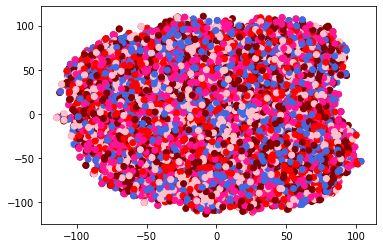

In [ ]:
plt.scatter(x_reduced[:,0],x_reduced[:,1],c=vectorizer(a.argmax(axis=1)))

# Random orthogonal plot

In [ ]:
from scipy.stats import ortho_group

In [ ]:
from numpy import load

train_labels = load("/content/drive/MyDrive/fingerprint_rishabh/data_lable1.npy")

In [ ]:
w=[]
t_arch=[]
right_loop=[]
left_loop=[]
arch=[]

In [ ]:

for i,j in enumerate(train_labels.argmax(axis=1)):
  if j==0 :
    w.append(i)
  elif j==1:
    t_arch.append(i)
  elif j==2:
    right_loop.append(i)
  elif j==3:
    left_loop.append(i)
  elif j==4:
    arch.append(i)
  




In [ ]:
data_0=train[w]
data_1=train[t_arch]
data_2=train[right_loop]
data_3=train[left_loop]
data_4=train[arch]

In [ ]:
m_0=ortho_group.rvs(dim=data_0.shape[1])
m_1=ortho_group.rvs(dim=data_1.shape[1])
m_2=ortho_group.rvs(dim=data_2.shape[1])
m_3=ortho_group.rvs(dim=data_3.shape[1])
m_4=ortho_group.rvs(dim=data_4.shape[1])

In [ ]:
projection_0=np.dot(data_0,m_0)
projection_1=np.dot(data_1,m_1)
projection_2=np.dot(data_2,m_2)
projection_3=np.dot(data_3,m_3)
projection_4=np.dot(data_4,m_4)

In [ ]:
data_final=np.concatenate((projection_0, projection_1,projection_2,projection_3,projection_4), axis=0)

In [ ]:
data_final.shape

(10000, 528)

#classwise

In [ ]:
x_reduced_projected=tsne.fit_transform(projection_0)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


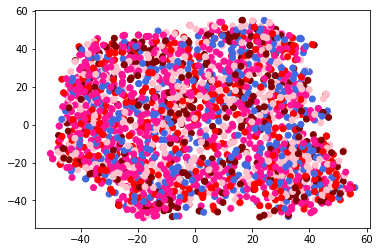

In [ ]:
plt.scatter(x_reduced_projected[:,0],x_reduced_projected[:,1],c=vectorizer(data_0.argmax(axis=1)))

In [ ]:
x_reduced_projected=tsne.fit_transform(projection_1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


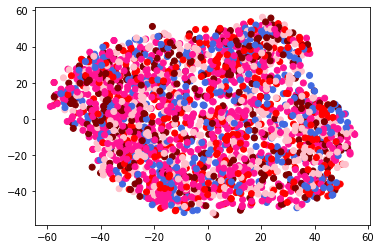

In [ ]:
plt.scatter(x_reduced_projected[:,0],x_reduced_projected[:,1],c=vectorizer(data_1.argmax(axis=1)))

In [ ]:
x_reduced_projected=tsne.fit_transform(projection_2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


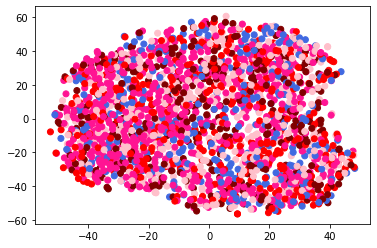

In [ ]:
plt.scatter(x_reduced_projected[:,0],x_reduced_projected[:,1],c=vectorizer(data_2.argmax(axis=1)))

In [ ]:
x_reduced_projected=tsne.fit_transform(projection_3)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


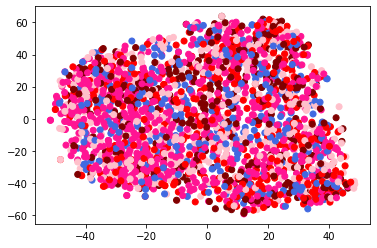

In [ ]:
plt.scatter(x_reduced_projected[:,0],x_reduced_projected[:,1],c=vectorizer(data_3.argmax(axis=1)))

In [ ]:
x_reduced_projected=tsne.fit_transform(projection_4)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


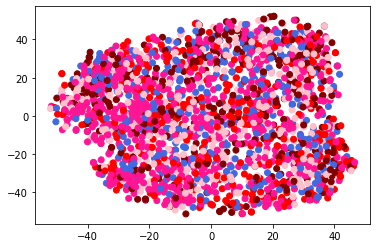

In [ ]:
plt.scatter(x_reduced_projected[:,0],x_reduced_projected[:,1],c=vectorizer(data_4.argmax(axis=1)))

#final_data

In [ ]:
x_reduced_projected=tsne.fit_transform(data_final)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


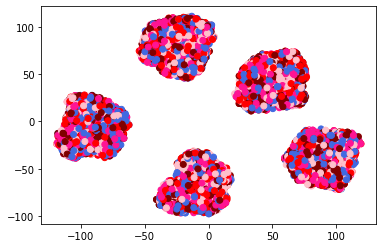

In [ ]:
plt.scatter(x_reduced_projected[:,0],x_reduced_projected[:,1],c=vectorizer(train_labels.argmax(axis=1)))

# Decoder layer and autoencoder for image recreation

In [ ]:
for layer in encoder_model.layers:
    layer.trainable = False

In [ ]:

input_img = Input(shape=(400, 272, 3))

latent=encoder_model(input_img)
decoder_input = Conv2D(3,(3, 3), padding='same', activation='relu')(latent)
x = UpSampling2D((2, 2))(decoder_input)

x = Conv2D(8,(3, 3), padding='same', activation='relu')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8,(3, 3), padding='same', activation='relu')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16,(3, 3), padding='same', activation='relu')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(3,(3, 3), padding='same')(x)

decoded = Activation('relu')(x)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 400, 272, 3)]     0         
                                                                 
 encoder_model (Functional)  (None, 25, 17, 3)         1803      
                                                                 
 conv2d_13 (Conv2D)          (None, 25, 17, 3)         84        
                                                                 
 up_sampling2d_4 (UpSampling  (None, 50, 34, 3)        0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 50, 34, 8)         224       
                                                                 
 up_sampling2d_5 (UpSampling  (None, 100, 68, 8)       0         
 2D)                                                       

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory('/content/gdrive/MyDrive/finger print detection/output/train',
                                                    batch_size = 20,
                                                    class_mode =  "input", 
                                                    target_size = (400, 272))     

validation_generator =  test_datagen.flow_from_directory( '/content/gdrive/MyDrive/finger print detection/output/val',
                                                          batch_size  = 20,
                                                          class_mode  = "input", 
                                                          target_size = (400, 272))

Found 451 images belonging to 5 classes.
Found 53 images belonging to 5 classes.


In [ ]:

autoencoder.fit_generator(train_generator,
            validation_data = validation_generator,
            epochs = 30,callbacks=[callback])

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


23/23 [==============================] - 4s 165ms/step - loss: 0.0470 - accuracy: 0.2616 - val_loss: 0.0466 - val_accuracy: 0.3321
Epoch 2/30
23/23 [==============================] - 3s 139ms/step - loss: 0.0460 - accuracy: 0.2830 - val_loss: 0.0459 - val_accuracy: 0.2578
Epoch 3/30
23/23 [==============================] - 3s 144ms/step - loss: 0.0453 - accuracy: 0.2780 - val_loss: 0.0453 - val_accuracy: 0.2727
Epoch 4/30
23/23 [==============================] - 3s 137ms/step - loss: 0.0448 - accuracy: 0.2756 - val_loss: 0.0448 - val_accuracy: 0.2646
Epoch 5/30
23/23 [==============================] - 3s 138ms/step - loss: 0.0443 - accuracy: 0.2692 - val_loss: 0.0443 - val_accuracy: 0.2788
Epoch 6/30
23/23 [==============================] - 3s 142ms/step - loss: 0.0439 - accuracy: 0.2731 - val_loss: 0.0440 - val_accuracy: 0.2719


In [ ]:
decoder_model = Model(decoder_input, decoded, name="decoder_model")
decoder_model.summary()


Model: "decoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 25, 17, 3)]       0         
                                                                 
 up_sampling2d_4 (UpSampling  (None, 50, 34, 3)        0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 50, 34, 8)         224       
                                                                 
 up_sampling2d_5 (UpSampling  (None, 100, 68, 8)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 100, 68, 8)        584       
                                                                 
 up_sampling2d_6 (UpSampling  (None, 200, 136, 8)    

In [ ]:
decoder_model.save('decoder.h5')
decoder=load_model('decoder.h5')

In [ ]:
decoder.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])

In [ ]:
img=tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/finger print detection/data/T-ARCH/327.jpg', target_size = (400,272))
test_image=tf.keras.preprocessing.image.img_to_array(img)
test_image=test_image.reshape(1,400,272,3)/255.

In [ ]:
laten_space_Tarch=encoder_model.predict(test_image)

In [ ]:
img=tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/finger print detection/output/train/arch/101.jpg', target_size = (400,272))
test_image=tf.keras.preprocessing.image.img_to_array(img)
test_image=test_image.reshape(1,400,272,3)/255.

In [ ]:
laten_space_arch=encoder_model.predict(test_image)


In [ ]:
alpha=0.4

In [ ]:
latent_final=alpha*laten_space_arch+(1-alpha)*laten_space_Tarch

In [ ]:
new_image=decoder_model.predict(latent_final)

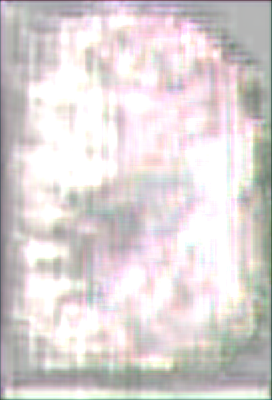

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(new_image[0]*180)

In [ ]:
# **#TSNE PLOT**

from numpy import load
train_images = load('/home/user/Downloads/data30000new.npy')
train_images.shape

from numpy import load
train_labels = load('/home/user/Downloads/labels30000new.npy')
train_labels.shape

#encoder_model=load_model("/content/gdrive/MyDrive/fingerprint_rishabh/Classifier200*136.h5")

from keras.models import load_model


encoder=load_model("/home/user/Music/finger/latent200*136.h5")
encoder.summary()

encoder_model.compile(loss='sparse_categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

#encoder_model = Model(input_img, encoded, name="encoder_model")
encoder.summary()
latent_space=encoder.predict(train_images)

latent_space[1]

#train=latent_space.reshape(-1,25*17*3)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=5000,init='pca')

x_reduced=tsne.fit_transform(latent_space)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
colors=['royalblue','red','deeppink','maroon','pink']
vectorizer= np.vectorize(lambda x:colors[x %len(colors)])

x_reduced.shape

colors=['royalblue','red','deeppink','maroon','pink']


plt.scatter(x_reduced[:,0],x_reduced[:,1],c=vectorizer(train_labels.argmax(axis=1)))

Model: "encoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 136, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 136, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 68, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 68, 8)        520       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 34, 8)        0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 50, 34, 8)      

2022-06-08 10:45:13.199989: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 9792000000 exceeds 10% of free system memory.
2022-06-08 10:45:27.216361: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (GPU_0_bfc) ran out of memory trying to allocate 9.12GiB (rounded to 9792000000)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-06-08 10:45:27.216432: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for GPU_0_bfc
2022-06-08 10:45:27.216461: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (256): 	Total Chunks: 62, Chunks in use: 62. 15.5KiB allocated for chunks. 15.5KiB in use in bin. 996B client-requested in use in bin.
2022-06-08 10:45:27.216478: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (512): 	Total Chunks: 2,

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

Use at 7f8544000700 of size 256 next 4
2022-06-08 10:45:27.216835: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 7f8544000800 of size 256 next 5
2022-06-08 10:45:27.216844: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 7f8544000900 of size 256 next 8
2022-06-08 10:45:27.216854: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 7f8544000a00 of size 256 next 9
2022-06-08 10:45:27.216863: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 7f8544000b00 of size 256 next 24
2022-06-08 10:45:27.216873: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 7f8544000c00 of size 256 next 26
2022-06-08 10:45:27.216882: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 7f8544000d00 of size 256 next 27
2022-06-08 10:45:27.216891: I tensorflow/core/common_runtime/bfc_allocator.cc:1066] InUse at 7f8544000e00 of size 256 next 28
2022-06-08 10:45:27.216900: I tensorflow/core/common_runtime/bfc_allocator.cc:1066